## Этап 1. Импортирование и знакомство с данными

### 1.1  Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файлов и знакомство с данными

Прочитаем два имеющихся датасета и сохраним их в переменные **model** и **city** :

In [2]:
model = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

Выведем все данные в **model** :

In [3]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Здесь встречаются такие столбцы как :
* model — модель самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Выведем общую информацию по **model**

In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Все данные на месте, типы данных корректны.

Выведем 10 случайные строк датасета **city** :

In [5]:
city.sample(10)

,city,average_flights
66,Псков,1.55
99,Якутск,2.74
14,Волгоград,5.13
57,Ноябрьск,3.00
1,Анадырь,1.00
71,Саранск,2.00
34,Курган,3.42
8,Благовещенск,1.00
0,Абакан,3.87
5,Барнаул,2.61


Здесь встречаются такие столбцы как:
* city — город
* average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Все данные на месте, типа данных корректны. 

## Этап 2. Анализ данных

### 2.1 Анализ по городам

Нам необходимо выбрать топ-10 городов по количеству рейсов.

In [7]:
top10_city = city.sort_values('average_flights', ascending = False).head(10)

In [8]:
top10_city

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Также посмотрим на эти данные визуально.

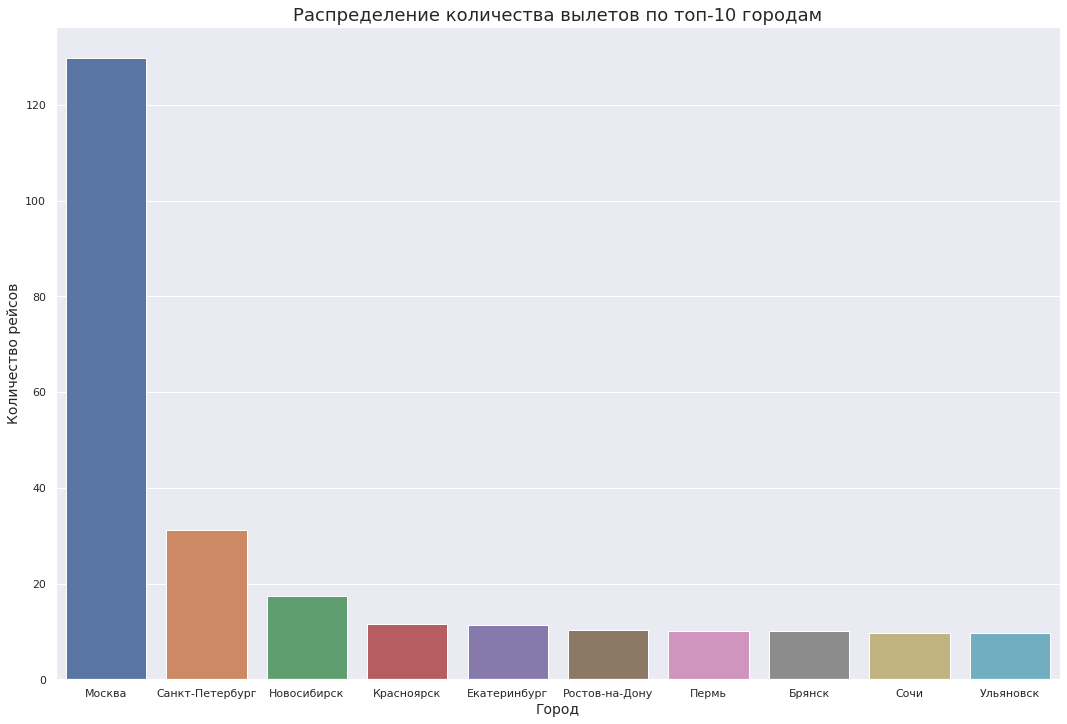

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,12))
sns.barplot(data=top10_city, x='city', y="average_flights")
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.title('Распределение количества вылетов по топ-10 городам', fontsize=18)
plt.show()

Предсказуемо Москва значительно обходит другие города по кличеству рейсов, это столица страны и также крупный транспортный хаб для путешествий. Второе место занимает Культурная столица страны - Санки-Петербург, которая является привлекательным городом для культурного туризма. Третье место занимает Новосибирск, который также является крупным транспортным хабом в Сибири. Остальные города в большинстве своем схожи, замыкает топ-10 город Ульяновск.

Сделаем более обширный график со всеми городами из датасета, чтоб увидеть нагляднее города, выходящие за топ-10.

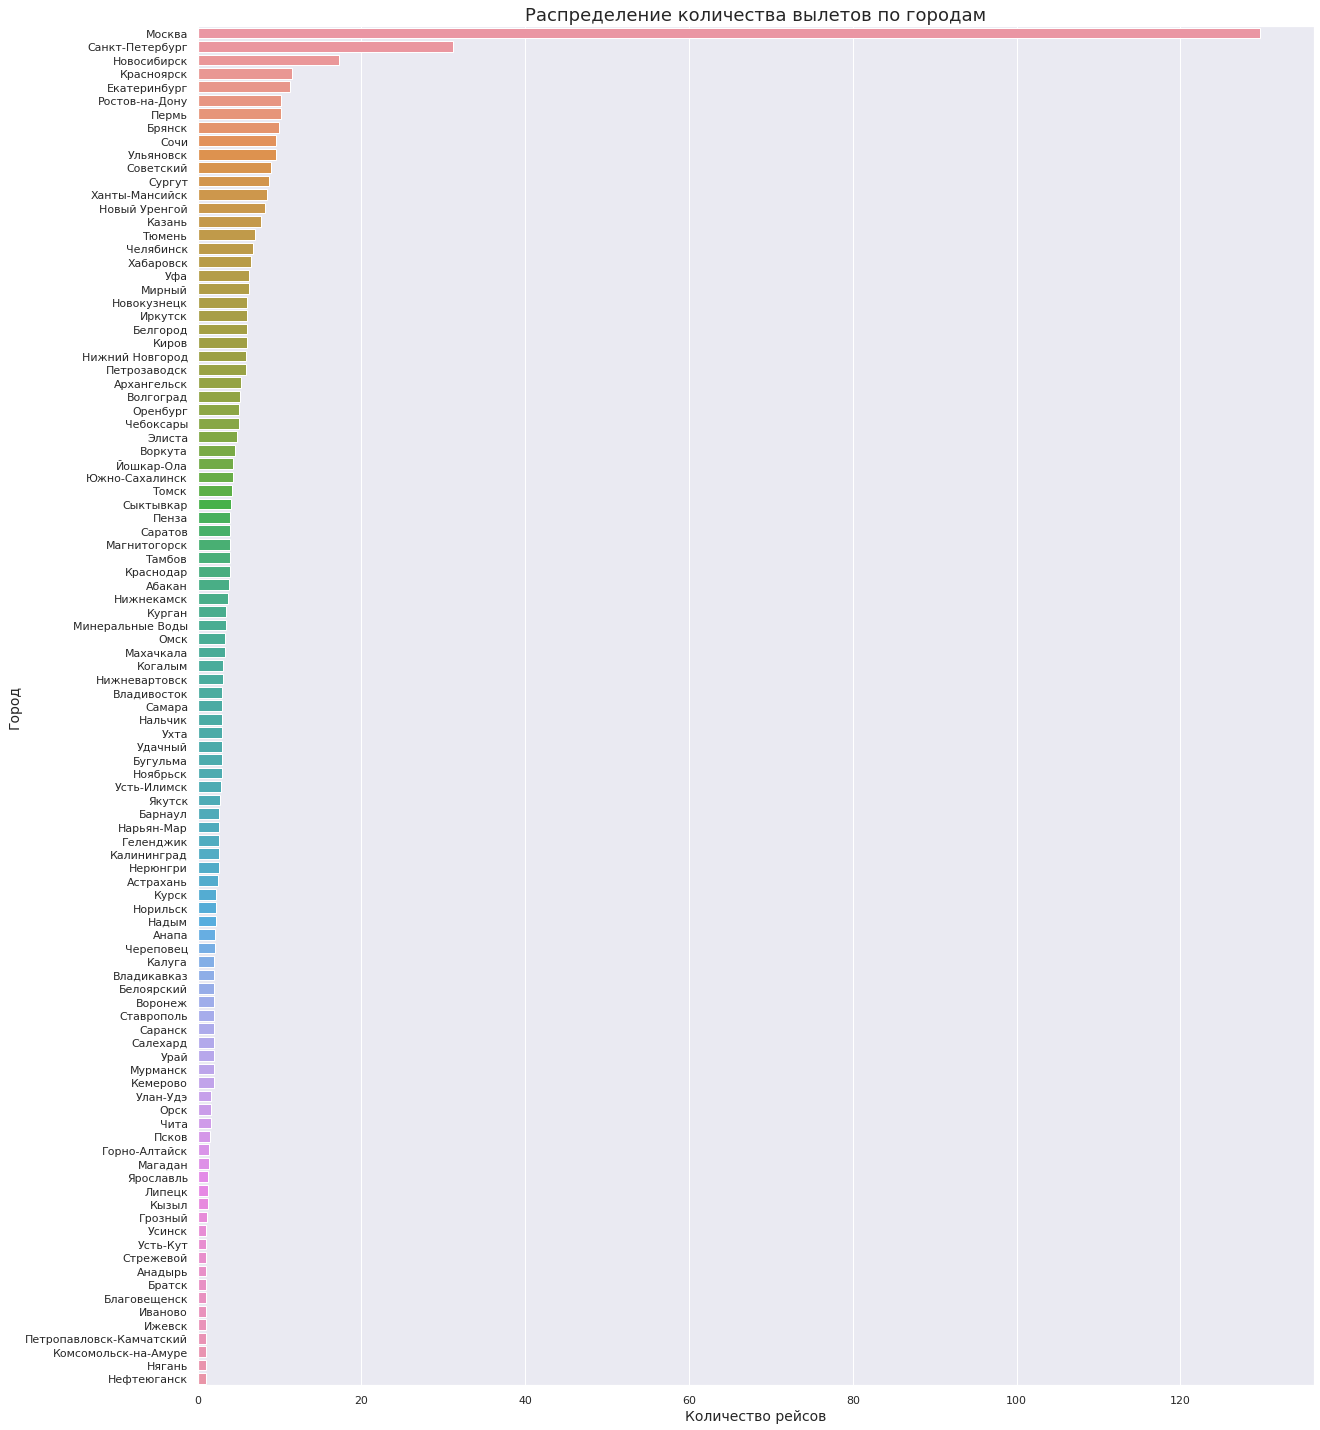

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,25))
sns.barplot(data=city.sort_values("average_flights",ascending = False), orient = 'h', y='city', x="average_flights")
plt.xlabel('Количество рейсов', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.title('Распределение количества вылетов по городам', fontsize=18)
plt.show()

Данныая визуализация демонстрирует популярность рейсов в Европейской части России, а также в Южной ее части, Восток и Север предоставлен значительно в меньших рейсах. Москва значительно впереди. 

### 2.2 Анализ по моделям самолета

Предоставлено 8 моделей самолетов, вспомним их, в порядке убывания рейсов:

In [11]:
model.sort_values('flights_amount',ascending= False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Также посмотрим на эти данные визуально.

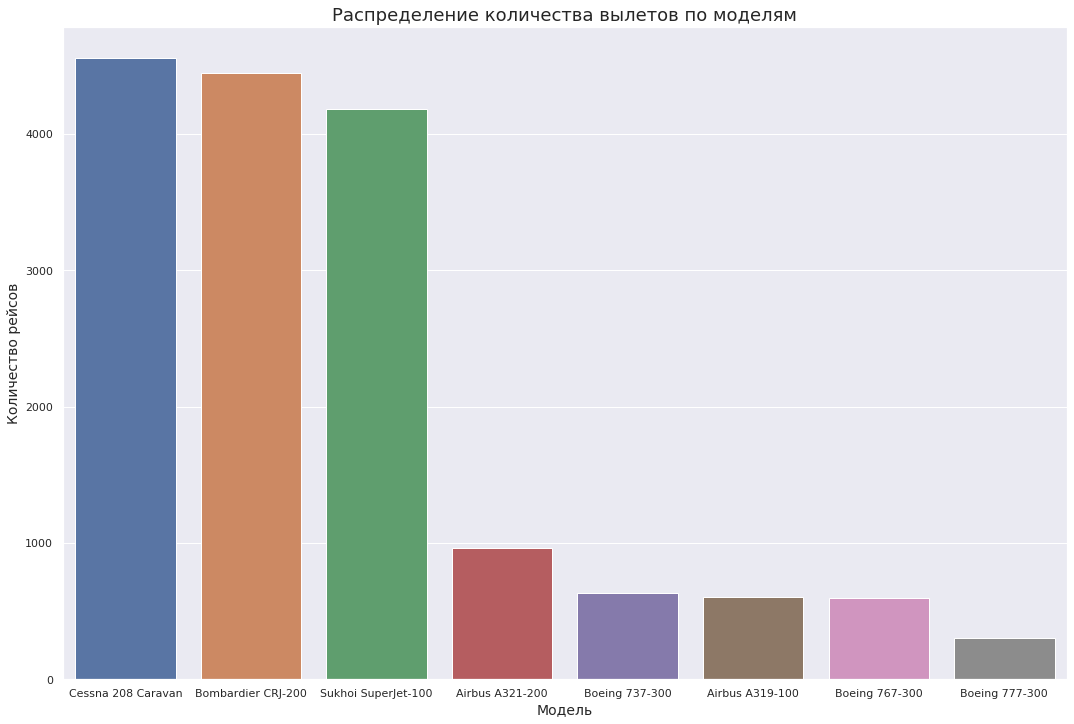

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,12))
sns.barplot(data=model.sort_values('flights_amount',ascending= False), x='model', y="flights_amount")
plt.xlabel('Модель', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.title('Распределение количества вылетов по моделям', fontsize=18)
plt.show()

Лидером по количеству рейсов выступает *Cessna 208 Caravan*, имеющий 4557 рейсов в сентябре 2018 года, вторую позицию занимает *Bombardier CRJ-200* с количеством 4446 рейсов, замыкает тройку модель - *Sukhoi SuperJet-100* с количеством - 4185 рейсов. Оставшиеся модели представлены в гораздо меньших количествах рейсах. Замыкает таблицу модель *Boeing 777-300* с количеством 300 рейсов.